In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем необходимые библиотеки и присваиваем им сокращенные названия. 

In [2]:
# Importing the dataset
df = pd.read_csv('weather.csv', sep=',')

Импортируем файл с данными используя библиотеку пандас.

In [3]:
df

,Wind_direction,Humidity,Pressure,Temperature
0,92.9,67.5,888.7,-2.9
1,93.0,69.6,888.4,-3.1
2,95.3,72.4,888.2,-3.5
3,89.6,74.1,887.9,-3.6
4,91.3,75.9,887.7,-3.8
...,...,...,...,...
3162,315.2,25.4,914.2,5.7
3163,74.8,25.5,896.9,5.6
3164,97.8,36.0,894.4,4.4
3165,99.8,36.6,892.8,4.1


Вывод: для построения модели прогнозирования температуры были использованы такие факторы как уровень влажности, давления и направление ветра. Количество наблюдений 3167, количество факторов 4 и все количественные.

In [4]:
df.dtypes

Wind_direction    float64
Humidity          float64
Pressure          float64
Temperature       float64
dtype: object

In [5]:
df.describe()

,Wind_direction,Humidity,Pressure,Temperature
count,3167.000000,3167.000000,3167.000000,3167.000000
mean,238.362614,44.592801,892.033470,-1.278465
std,92.978498,22.957418,17.257408,5.510748
min,2.500000,14.500000,868.100000,-16.000000
25%,108.500000,29.400000,881.700000,-5.100000
50%,292.800000,36.800000,885.900000,-1.400000
75%,299.100000,49.700000,895.350000,2.700000
max,359.900000,99.400000,945.500000,14.000000


Описываем основные статистики наших данных. Можем видеть среднее значение по каждой переменной, 
стандартное отклонение, минимум, максимум и сколько попадает в 25%, 50% и 75%.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


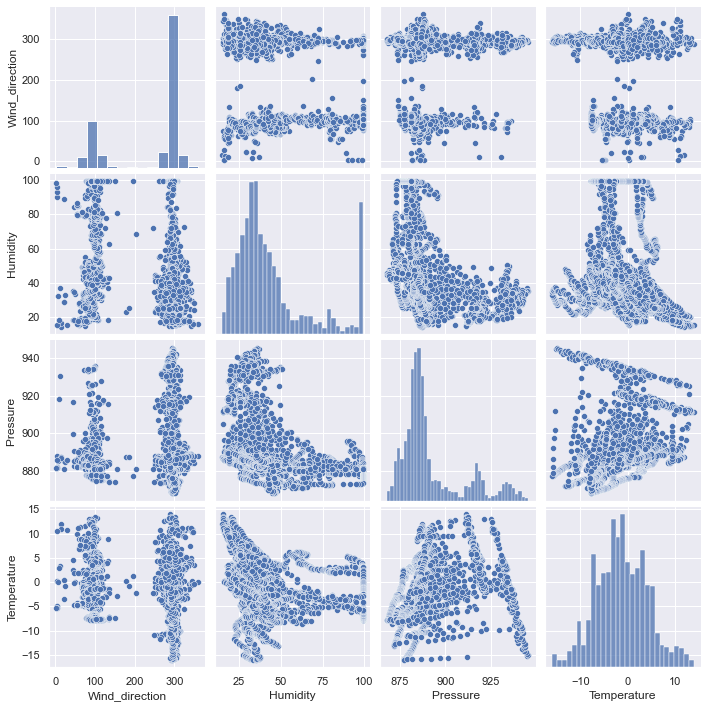

In [6]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Демонтрация распределений.

In [7]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Обрабатываем выбросы с помощью цикла for и условного ветвления if.

In [8]:
# Outliers
df = outliers(df)
df.describe()

,Wind_direction,Humidity,Pressure,Temperature
count,3167.000000,3167.000000,3167.000000,3167.000000
mean,238.362614,44.592801,892.032120,-1.278465
std,92.978498,22.957418,17.253305,5.510748
min,2.500000,14.500000,868.100000,-16.000000
25%,108.500000,29.400000,881.700000,-5.100000
50%,292.800000,36.800000,885.900000,-1.400000
75%,299.100000,49.700000,895.350000,2.700000
max,359.900000,99.400000,943.805695,14.000000


Так как статистика не поменялась, можно сделать вывод, что выбросов не было.

In [9]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Temperature,0,0.0
Pressure,0,0.0
Humidity,0,0.0
Wind_direction,0,0.0


Проверяем наличие пропусков, их нет, движемся дальше.

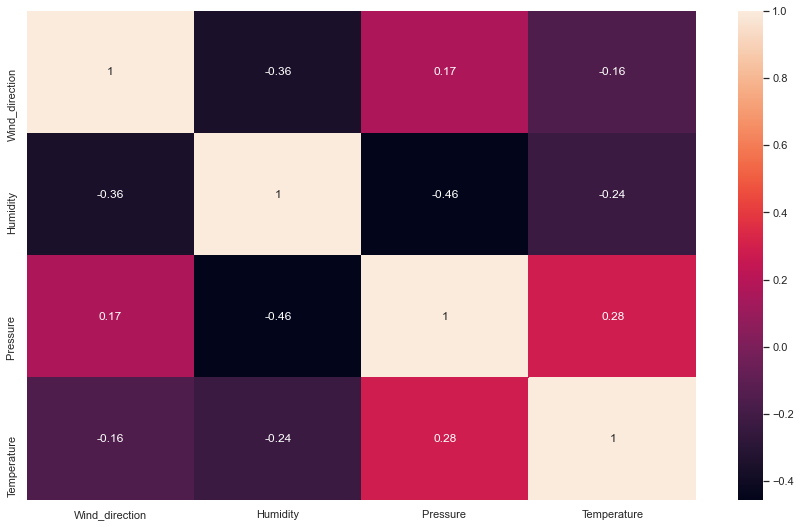

In [10]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Для того, чтобы выяснить какие переменные у нас самые значимые, мы построим их корреляционную матрицу и видим, 
что влажность и давление имеют относительно всокие корреляции.

In [11]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Выделил нужные Х и У, а затем разделил датасет на тестовый (20%) и обучающий (80%).

In [12]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     157.8
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           9.34e-94
Time:                        15:47:06   Log-Likelihood:                -7697.7
No. Observations:                2533   AIC:                         1.540e+04
Df Residuals:                    2529   BIC:                         1.543e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -58.8994      5.948     -9.903      0.000     -70.562     -47.236
x1            -0.0164      0.001    -14.030      0.000      -0.019      -0.014
x2            -0.0542      0.005    -10.390      0.000      -0.064      -0.044
x3             0.0717      0.007     10.972      0.000       0.059       0.085
==============================================================================
Omnibus:                       17.683   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.853
Skew:                          -0.203   Prob(JB):                     0.000133
Kurtosis:                       3.064   Cond. No.                     5.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

С помощью библиотеки statsmodels строим множественную регрессию, при этом добавляем константу.
Затем узнаем p-values у всех переменных, R-sq и можем решить какие переменные включать.

In [13]:
X_train = X_train[:, [0, 1, 2]]
X_test = X_test[:, [0, 1, 2]]

In [14]:
# Fitting Optimized Multiple Regression to the Training set
mr = LinearRegression().fit(X_train, y_train)

Строим модель для train-множества.

In [15]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-0.01639784, -0.05424011,  0.07173551]), -58.89943357625693)

Оцениваем коэффициенты регрессии.

In [16]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Строим прогноз по этой модели.

In [17]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.15767784581249145, 0.17381574415729295)

Оцениваем коэффициент детерминации, видим, что на обучающей выборке 0,15, а вот на 
тестовой выборке он вырос, что говорит о том, что модель улучшилась.

In [18]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(25.534158791004234, 25.21151414866594)

Оцениваем среднюю квадратическую ошибку, также видим что на тестовой выборке она меньше.

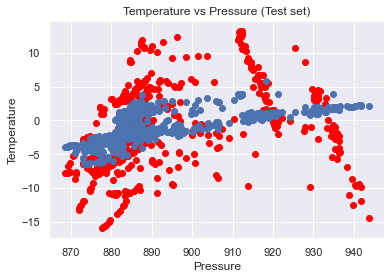

In [19]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Temperature vs Pressure (Test set)')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

Визуализируем результаты, видим линейность.

In [20]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [21]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [23]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [26]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=3, units=6)`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=6)`
  
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [27]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
2533/2533 [==============================] - 1s 323us/step - loss: 0.8563 - accuracy: 0.0000e+00
Epoch 2/100
2533/2533 [==============================] - 1s 208us/step - loss: 0.7947 - accuracy: 0.0000e+00
Epoch 3/100
2533/2533 [==============================] - 1s 207us/step - loss: 0.7753 - accuracy: 0.0000e+00
Epoch 4/100
2533/2533 [==============================] - 1s 288us/step - loss: 0.7499 - accuracy: 0.0000e+00
Epoch 5/100
2533/2533 [==============================] - 1s 244us/step - loss: 0.7250 - accuracy: 0.0000e+00
Epoch 6/100
2533/2533 [==============================] - 1s 226us/step - loss: 0.7021 - accuracy: 0.0000e+00
Epoch 7/100
2533/2533 [==============================] - 1s 271us/step - loss: 0.6819 - accuracy: 0.0000e+00
Epoch 8/100
2533/2533 [==============================] - 1s 268us/step - loss: 0.6692 - accuracy: 0.0000e+00
Epoch 9/100
2533/2533 [==============================] - 0s 181us/step - loss: 0.6552 - accuracy: 0.0000e+00
Epoch 10/100
2533/2

In [29]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [30]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [31]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

13.717818458525374

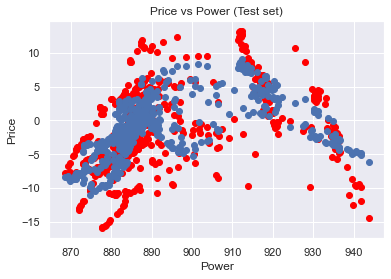

In [33]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Price vs Power (Test set)')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()